In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline

from sklearn.model_selection import train_test_split
from sklearn.cross_validation import KFold 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score



Populating the interactive namespace from numpy and matplotlib


C:\Users\Hannah\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['test', 'array', 'seed']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [16]:
data = pd.read_csv("C:\\Users\Hannah\Desktop\Research Project\data.csv",header=0)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [17]:
prediction_var = ['texture_mean', 'smoothness_mean', 'compactness_mean',
       'radius_se', 'symmetry_se', 'symmetry_mean', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
        'area_worst', 'smoothness_worst',
       'compactness_worst', 'symmetry_worst']
array = data.values
X = array[:,0:3]
Y = array[:,3] 
validation_size = 0.30
seed = 7 #what does this mean?
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)
train, test = train_test_split(data, test_size = 0.3)
X_train = train[prediction_var]
Y_train=train.diagnosis

X_test= test[prediction_var] 
Y_test =test.diagnosis

In [18]:
models = []
models.append(('Logistic Regresstion', LogisticRegression()))
models.append(('MLP Classifier', MLPClassifier()))
models.append(('KNNeighbors Classifier', KNeighborsClassifier()))
models.append(('Random Forest Classifier', RandomForestClassifier()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('SVM', SVC()))

results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold)
    results.append(cv_results)
    names.append(name)
    statement = "K-Fold Cross Validation Accuracy of %s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(statement) #mean of accuracies and their std

K-Fold Cross Validation Accuracy of Logistic Regresstion: 0.947308 (0.020670)
K-Fold Cross Validation Accuracy of MLP Classifier: 0.587115 (0.164133)
K-Fold Cross Validation Accuracy of KNNeighbors Classifier: 0.876538 (0.050740)
K-Fold Cross Validation Accuracy of Random Forest Classifier: 0.949679 (0.016126)
K-Fold Cross Validation Accuracy of Naive Bayes: 0.952500 (0.041003)
K-Fold Cross Validation Accuracy of SVM: 0.658013 (0.082881)


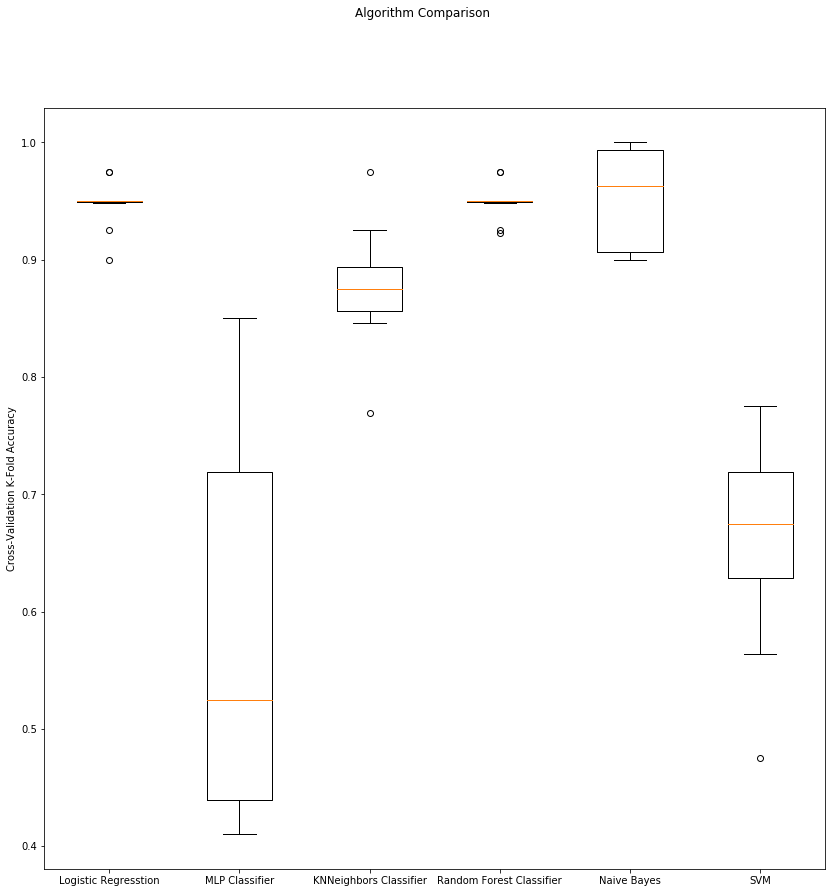

In [20]:
fig = plt.figure(figsize=(14,14))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111) #why 111?
plt.boxplot(results)
ax.set_xticklabels(names)
ax.set_ylabel('Cross-Validation K-Fold Accuracy')
plt.show()

In [23]:
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('MLP Classifier', MLPClassifier()))
models.append(('KNNeighbors Classifier', KNeighborsClassifier()))
models.append(('Random Forest Classifier', RandomForestClassifier()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('SVM', SVC()))


resultsF1 = []
names = []
for name, model in models:
    model.fit(X_train, Y_train)
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    f1_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='f1_macro')
    resultsF1.append(f1_results)
    names.append(name)
    f1Statement = "F1 Score of %s: %f (%f)" % (name, f1_results.mean(), f1_results.std())
    print(f1Statement)

F1 Score of Logistic Regression: 0.942175 (0.019965)
F1 Score of MLP Classifier: 0.483556 (0.209021)


C:\Users\Hannah\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Hannah\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Hannah\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Hannah\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Hannah\Anaconda3\lib\site-packages\sklearn\metr

F1 Score of KNNeighbors Classifier: 0.864999 (0.052049)
F1 Score of Random Forest Classifier: 0.952015 (0.033702)
F1 Score of Naive Bayes: 0.947029 (0.045544)
F1 Score of SVM: 0.511396 (0.083693)


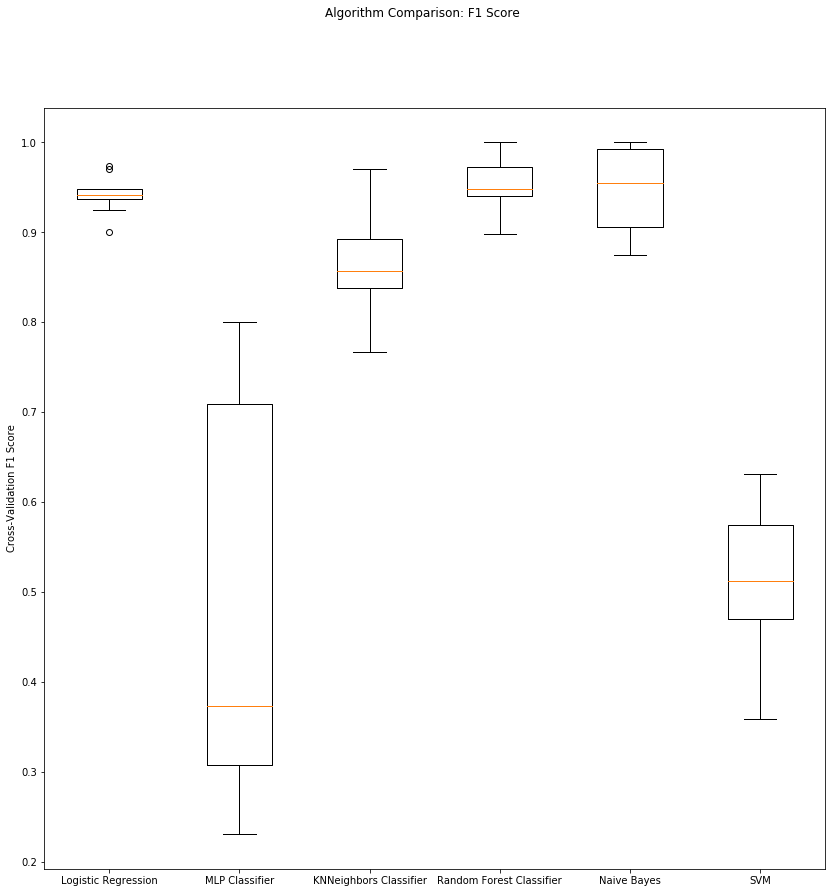

In [24]:
fig = plt.figure(figsize=(14,14))
fig.suptitle('Algorithm Comparison: F1 Score') 
ax = fig.add_subplot(111)
plt.boxplot(resultsF1)
ax.set_xticklabels(names)
ax.set_ylabel('Cross-Validation F1 Score')
plt.show()